## ****Import Dependencies****

In [697]:
import pandas as pd           
import numpy as np                  
import seaborn as sns        
import matplotlib.pyplot as plt     
import warnings 
    
pd.set_option('display.max_rows',100)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

## ****Load Dataset****

In [580]:
data=pd.read_csv('ebola_data_db_format.csv')

## ****Data Understanding****

**Brief Informational Summary about the Dataset**

In [581]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  17585 non-null  object 
 1   Country    17585 non-null  object 
 2   Date       17585 non-null  object 
 3   value      17585 non-null  float64
dtypes: float64(1), object(3)
memory usage: 549.7+ KB


**Brief Descriptive Statistics about the Dataset**

In [582]:
data.describe(include='all')

,Indicator,Country,Date,value
count,17585,17585,17585,17585.000000
unique,36,12,259,NaN
top,"Cumulative number of confirmed, probable and s...",Sierra Leone,2014-09-05,NaN
freq,2485,2303,126,NaN
mean,NaN,NaN,NaN,955.857987
std,NaN,NaN,NaN,2313.569259
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,287.000000


**Number of Unique Records in each column of the Dataset**

In [583]:
data.nunique()

Indicator      36
Country        12
Date          259
value        1793
dtype: int64

**Number of Null / NA values in each column of the Dataset**

In [584]:
data.isna().sum()

Indicator    0
Country      0
Date         0
value        0
dtype: int64

**Total Number of Duplicate Records / Entries in the Dataset**

In [585]:
data.duplicated().sum()

0

**Head of the DataFrame**

In [586]:
data.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


**Tail of the DataFrame**

In [587]:
data.tail()

,Indicator,Country,Date,value
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0
17584,"Cumulative number of confirmed, probable and s...",United States of America,2016-03-23,1.0


## ****Data Preprocessing****

**Format column names to lower case**

In [588]:
data.columns=data.columns.str.lower()

**Format the features Date and Value to correct datatypes**

In [589]:
data['date']=pd.to_datetime(data['date'])

In [590]:
data['value']=data['value'].astype(int)

In [591]:
data.rename(columns={
    'value':'cases'
    },inplace=True)

**Update the Feature Country**

In [592]:
data['country']=data['country'].str.replace('Liberia 2','Liberia').str.replace('Guinea 2','Guinea')

## ****Exploratory Data Analysis****

**Perform an Exploratory Data Analysis on the number of Confirmed Death Cases due to Ebola**

In [593]:
data=data.query('indicator == "Cumulative number of confirmed Ebola deaths"').reset_index(drop=True)

**Feature Creation**

In [594]:
feature=data.copy()
feature['year']=feature['date'].dt.year.astype(int)
feature['month']=feature['date'].dt.month.astype(int)
feature['day']=feature['date'].dt.day.astype(int)

#### ***Estimates of Location***

**Mean**

In [595]:
print(f"Average Number of Cases : {data['cases'].mean():,.0f}")

Average Number of Cases : 782


**Trimmed Mean**

In [596]:
from scipy.stats import trim_mean
print(f"Trimmed Mean : {trim_mean(data['cases'].sort_values(ascending=False),0.1):,.0f}")

Trimmed Mean : 531


**Weighted Mean**

In [597]:
print(f"Weighted Mean : {np.average(feature['cases'],weights=feature['year']):,.0f}")

Weighted Mean : 782


**Median**

In [598]:
print(f"Average Number of Cases : {data['cases'].median():,.0f}")

Average Number of Cases : 2


**Weighted Median**

In [599]:
import wquantiles as wq 
print(f"Weighted Median : {wq.median(feature['cases'],weights=feature['year']):,.0f}")

Weighted Median : 2


#### ***Estimates of Variability/Dispersion***

**Standard Deviation**

In [600]:
print(f"Standard Deviation of Number of Cases : {data['cases'].std():,.0f}")

Standard Deviation of Number of Cases : 1,258


**Mean Absolute Deviation**

In [601]:
print(f"Median Absolute Deviation : {np.average(np.absolute(data['cases']-data['cases'].mean())):,.0f}")

Median Absolute Deviation : 1,067


**Median Absolute Deviation**

In [602]:
print(f"Median Absolute Deviation : {np.average(np.absolute(data['cases']-data['cases'].median())):,.0f}")

Median Absolute Deviation : 781


**Interquartile Range**

In [603]:
iqr1,iqr2=np.percentile(data['cases'],[75,25])
print(f"Interquartile Range : {np.subtract(iqr1,iqr2):,.0f}")

Interquartile Range : 1,761


#### ***Exploring Data Distrbution***

**BoxPlot**

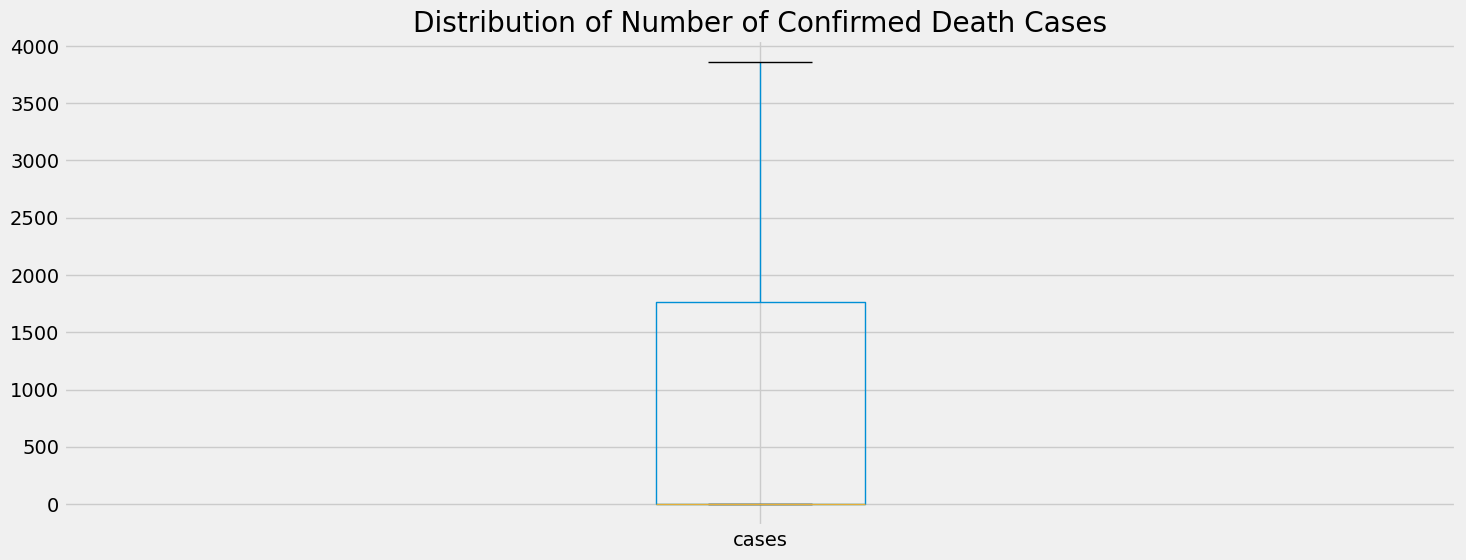

In [604]:
data.boxplot(column=['cases'],figsize=(16,6))
plt.title('Distribution of Number of Confirmed Death Cases')
plt.show()

*The median is very close to zero*

**Percentile**

In [605]:
data['cases'].quantile([0.05,0.1,0.2,0.25,0.5,0.75,1.0])

0.05       0.00
0.10       0.00
0.20       0.00
0.25       0.00
0.50       2.00
0.75    1760.75
1.00    3858.00
Name: cases, dtype: float64

**Histogram**

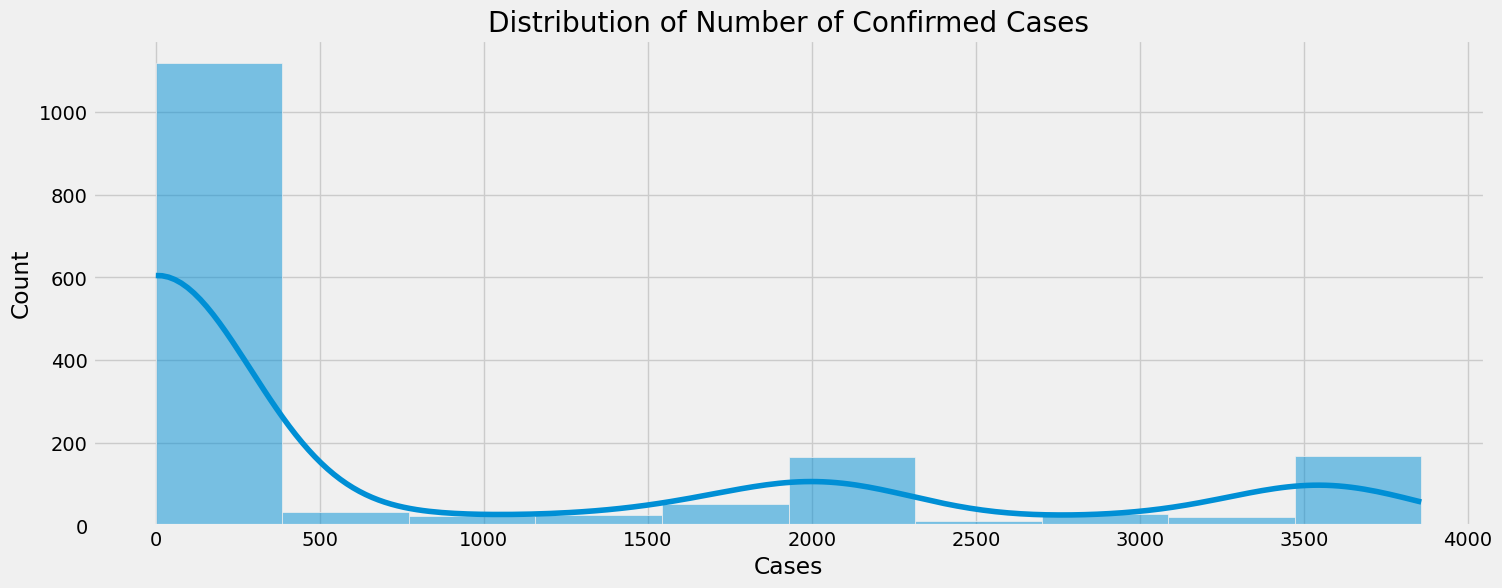

In [606]:
plt.figure(figsize=(16,6))
sns.histplot(x=data['cases'],kde=True,bins=10)
plt.title('Distribution of Number of Confirmed Cases')
plt.xlabel('Cases')
plt.show()

*Confirmed number of death cases due to Ebola is greatly distributed around 7*

#### ***Exploring Two or More Variables***

**BarPlot**

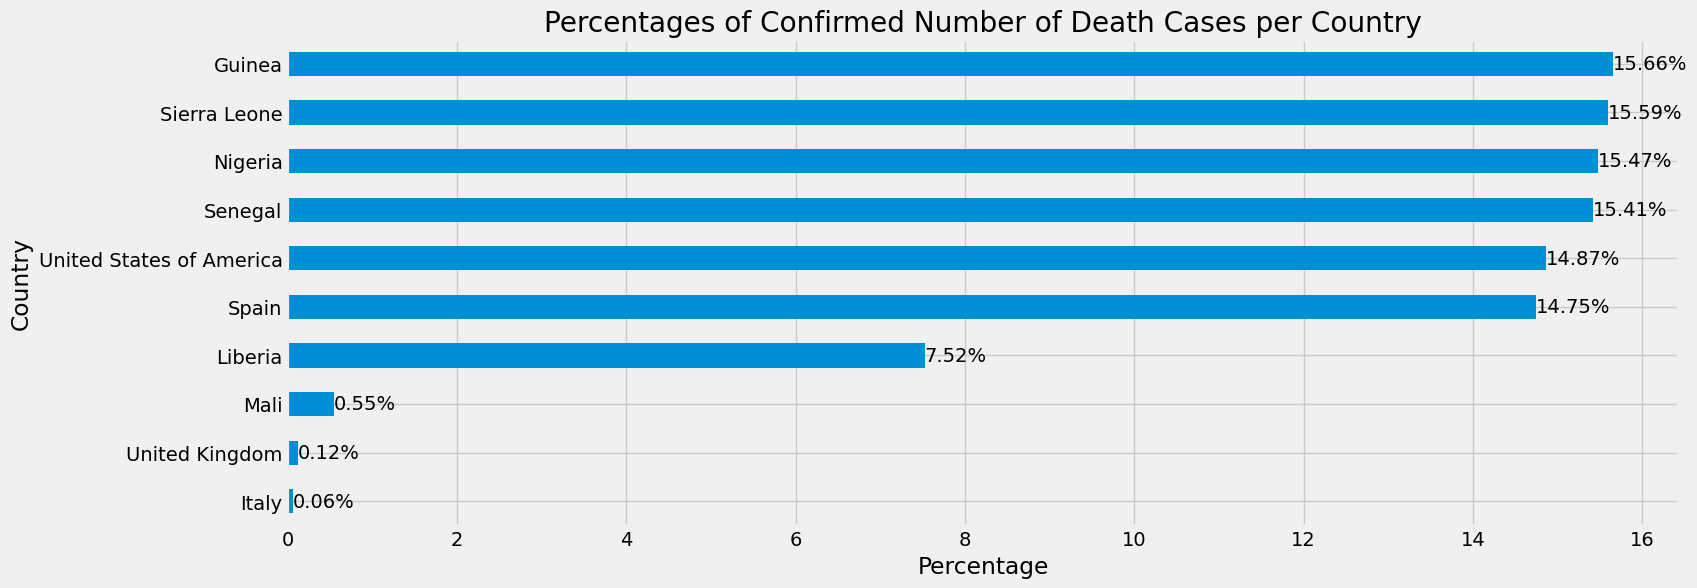

In [607]:
ax=(data['country'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Percentages of Confirmed Number of Death Cases per Country')
plt.show()

*Sierra Leone, Guinea, Nigeria and Senegal make up over 60% of the entire confirmed death cases which concludes <br/> that West Africa has the highest number of confirmed death cases due to Ebola*

**Correlation**

*Correlation Matrix*

In [608]:
feature[['date','year','month','day','cases']].corr()

,date,year,month,day,cases
date,1.000000,0.674674,0.367525,-0.008158,0.075144
year,0.674674,1.000000,-0.435635,-0.045187,0.124125
month,0.367525,-0.435635,1.000000,-0.037702,-0.064361
day,-0.008158,-0.045187,-0.037702,1.000000,-0.006856
cases,0.075144,0.124125,-0.064361,-0.006856,1.000000


*Correlation Coefficient*

In [609]:
from scipy.stats import pearsonr
corr,p_value=pearsonr(feature['year'],feature['cases'])
print(f"Correlation Coefficient : {corr}\nP-Value : {p_value}")

Correlation Coefficient : 0.1241247813385378
P-Value : 4.311788000841708e-07


*Since the p-value is less than 0.005, we have a strong certainty of the low correlation between year and confirmed number of death cases*

**Chi-Square Test of Association**

*Null Hypothesis : There is an association between Year and Number of Confirmed Death Cases*

In [610]:
from scipy.stats import chi2_contingency
res=chi2_contingency(feature[['month','cases']])
print(f"Chi-Square Statistic : {res.statistic}\nP-Value : {res.pvalue}\nDegree of Freedom : {res.dof}")

Chi-Square Statistic : 750131.8965509662
P-Value : 0.0
Degree of Freedom : 1647


In [611]:
if res.pvalue < 0.005 :
    print('True')
else :
    print('False')

True


*Using a significance level of 5%, we accept the null hypothesis and reject the alternate hypothesis which states there <br/> is no association between year and number of confirmed cases*

**Regression Plot**

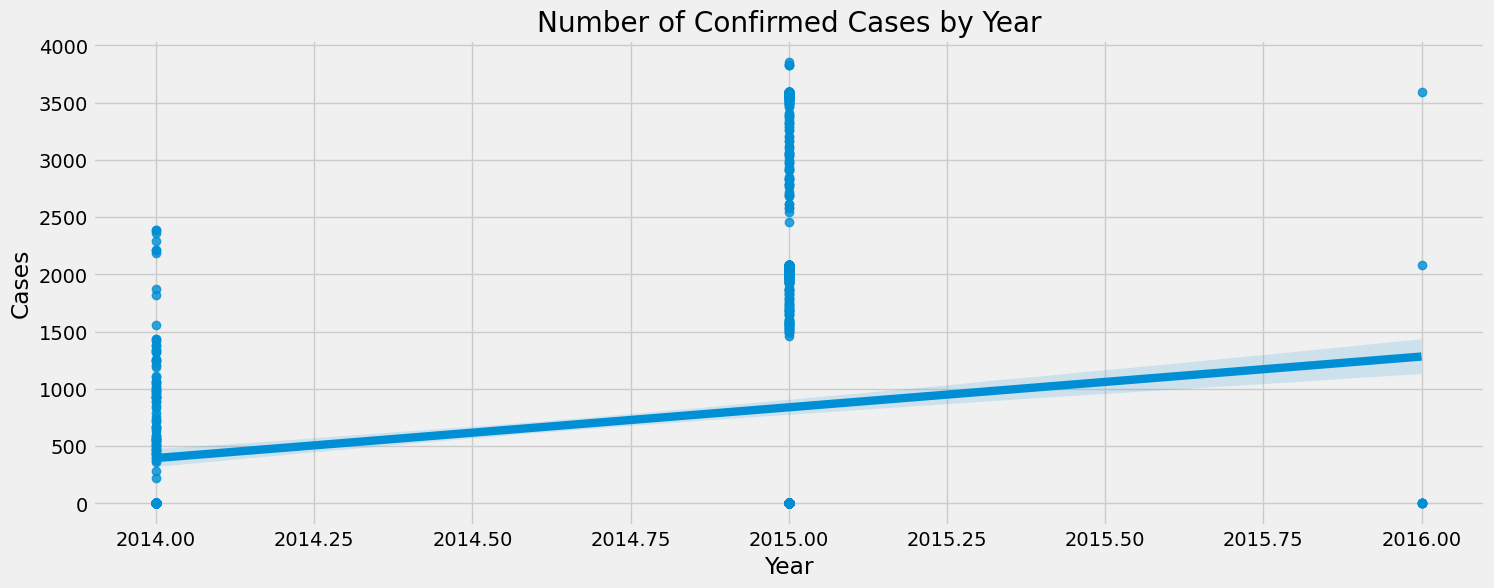

In [612]:
plt.figure(figsize=(16,6))
sns.regplot(x=feature['year'],y=feature['cases'])
plt.title('Number of Confirmed Cases by Year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

*Evidence of low positive correlation between year and number of confirmed death cases*

#### ***Exploring Binary and Categorical Data***

**Contigency Table**

In [613]:
contigency_table=pd.pivot_table(data=feature,index='year',columns=['month'],fill_value='No Deaths',values='cases',aggfunc=['sum'])

In [614]:
contigency_table

sum                                                         \
month         1          2          3          4          5          6    
year                                                                      
2014   No Deaths  No Deaths  No Deaths  No Deaths  No Deaths  No Deaths   
2015       89395      99465      87035      81808     116170     122889   
2016   No Deaths  No Deaths       5684  No Deaths  No Deaths  No Deaths   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
2014   No Deaths        898      12330      18002      13723      39738  
2015      129858     119039     124880      96568      62502      68195  
2016   No Deaths  No Deaths  No Deaths  No Deaths  No Deaths  No Deaths

**BoxPlot**

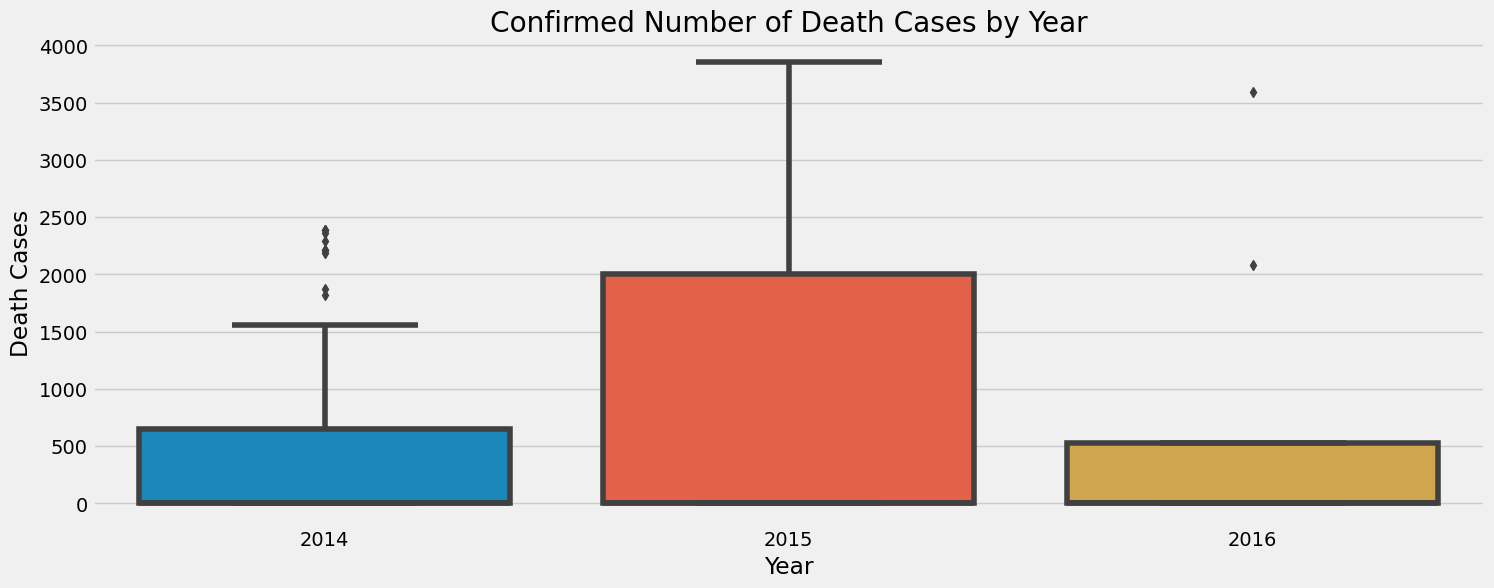

In [615]:
plt.figure(figsize=(16,6))
sns.boxplot(x=feature['year'],y=feature['cases'])
plt.title('Confirmed Number of Death Cases by Year')
plt.xlabel('Year')
plt.ylabel('Death Cases')
plt.show()

*There is a high percentage of confirmed number of death cases in 2015 compared to the other two years*

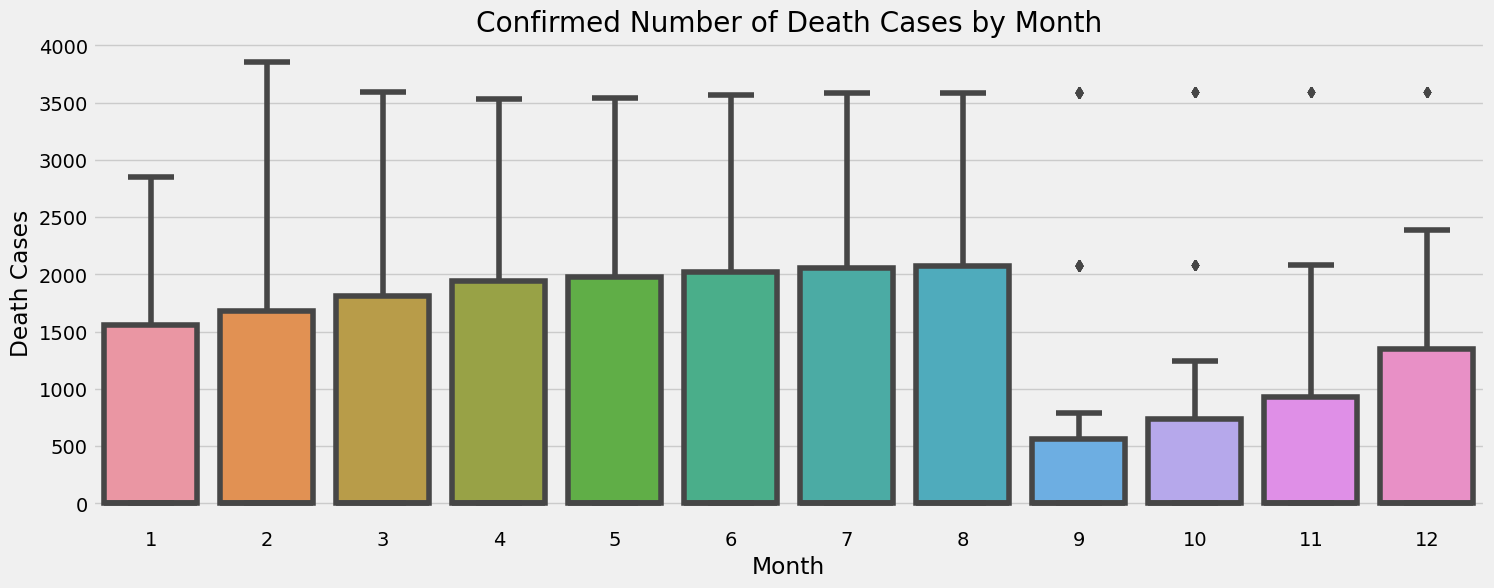

In [616]:
plt.figure(figsize=(16,6))
sns.boxplot(x=feature['month'],y=feature['cases'])
plt.title('Confirmed Number of Death Cases by Month')
plt.xlabel('Month')
plt.ylabel('Death Cases')
plt.show()

*The distribution of Number of Confirmed Death Cases increases steeply from January to August,<br/> then takes a sudden drop after which steeply increases again*

#### ***Outlier Detection & Removal Using Interquartile Range***

*Calculate the Interquartile Range (IQR)*

In [617]:
IQR=np.subtract(iqr1,iqr2)

*Set the Upper & Lower Limit for Outlier Removal*

In [618]:
upper_limit= iqr1 + 1.5*IQR
lower_limit= iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit:,.0f}\nLower Limit : {lower_limit}")

Upper Limit : 4,402
Lower Limit : -2641.125


*Query Outliers in the Dataset*

In [619]:
data.loc[(data['cases'] > upper_limit) | (data['cases'] < lower_limit)]

,indicator,country,date,cases


*There are no outliers in the dataset*

*Query data with no Outliers*

In [620]:
data.loc[(data['cases'] < upper_limit) & (data['cases'] > lower_limit)]

,indicator,country,date,cases
0,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778
1,Cumulative number of confirmed Ebola deaths,Sierra Leone,2015-03-10,3263
2,Cumulative number of confirmed Ebola deaths,Nigeria,2015-03-10,7
3,Cumulative number of confirmed Ebola deaths,Senegal,2015-03-10,0
4,Cumulative number of confirmed Ebola deaths,Spain,2015-03-10,0
...,...,...,...,...
1643,Cumulative number of confirmed Ebola deaths,Guinea,2016-03-23,1
1644,Cumulative number of confirmed Ebola deaths,Nigeria,2016-03-23,7
1645,Cumulative number of confirmed Ebola deaths,Senegal,2016-03-23,0
1646,Cumulative number of confirmed Ebola deaths,Spain,2016-03-23,0


#### ***Time Series Analysis***

#### ***Data Preprocessing***

In [699]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

**Set date as the index**

In [621]:
data.set_index('date',inplace=True)

**Feature Creation**

In [653]:
def create_dataframe(df):
    data['year']=data.index.year  
    data['month']=data.index.month 
    data['dayofweek']=data.index.dayofweek
    data['dayofyear']=data.index.dayofyear
    data['day']=data.index.day
    data['hour']=data.index.hour
    data['minute']=data.index.minute
    data['secs']=data.index.second
    return df

In [654]:
data=create_dataframe(data)

**Split the Data into Train/Test**

In [659]:
train=data[data.index < '2015-09-01'][['country','year','month','dayofyear','dayofweek','day','cases']].reset_index(drop=True)
test=data[data.index >= '2015-09-01'][['country','year','month','dayofyear','dayofweek','day','cases']].reset_index(drop=True)

In [660]:
X_train=train.drop(columns=['cases'],axis=1)
y_train=train['cases']

X_test=test.drop(columns=['cases'],axis=1)
y_test=test['cases']

**Encoding**

In [663]:
enc=OneHotEncoder(handle_unknown='ignore').fit(train)
X_train=enc.fit_transform(X_train)
X_test=enc.transform(X_test)

**Model Development**

*Model Validation*

In [736]:
# param_grid={
#     'max_depth':[3,4,5],
#     'learning_rate':[0.1,0.5],
#     'gamma':[0.5,1.0],
#     'reg_lambda':[1.0,10.0]
# }

# optional_param=GridSearchCV(
#     estimator=xgb.XGBRegressor(n_estimators=500),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=2,
#     n_jobs=5,cv=5
# )

# optional_param.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=100)

# print(f"Best Parameters : {optional_param.best_params_}")

*First Attempt
<br/>max_depth -3, gamma - 0.25, learning_rate - 0.001, reg_lambda - 0.25
<br/>Second Attempt
<br/>max_depth -3, gamma - 0.5, learning_rate - 0.005, reg_lambda - 1.0
<br/>Third Attempt
<br/>max_depth -3, gamma - 1.0, learning_rate - 0.1, reg_lambda - 1.0
<br/>Fourth Attempt
<br/>max_depth -3, gamma - 1.0, learning_rate - 0.1, reg_lambda - 1.0*

In [747]:
model=xgb.XGBRegressor(n_estimators=500,max_depth=3,gamma=1.0,learning_rate=0.1,reg_lambda=1.0)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=100)

[0]	validation_0-rmse:1309.41556	validation_1-rmse:1418.48035
[80]	validation_0-rmse:113.99375	validation_1-rmse:202.43674


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [748]:
model=xgb.XGBRegressor()
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=100)

[0]	validation_0-rmse:1023.82643	validation_1-rmse:1120.67982


[36]	validation_0-rmse:12.98075	validation_1-rmse:109.26241


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [749]:
y_pred=model.predict(X_test)
print(f"R2-Score : {r2_score(y_test,y_pred)*100:,.4f}%\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2-Score : 99.3380%
Root Mean Squared Error : 109.08338265585952


In [745]:
predict=pd.DataFrame({
    'actual':list(y_test),
    'prediction':list(y_pred)
})

predict.iloc[:10]

,actual,prediction
0,3587,3501.365479
1,2077,1943.005981
2,2,26.647638
3,7,7.359998
4,0,0.403394
5,0,0.403394
6,1,1.357727
7,2077,1907.460571
8,3587,3462.500977
9,2,24.034550


In [740]:
test['predictions']=predict['prediction']
test['error']=np.subtract(test['cases'],test['predictions'])
test.iloc[:10]

,country,year,month,dayofyear,dayofweek,day,cases,predictions,error
0,Sierra Leone,2015,9,244,1,1,3587,3501.365479,85.634521
1,Guinea,2015,9,244,1,1,2077,1943.005981,133.994019
2,Liberia,2015,9,244,1,1,2,26.647638,-24.647638
3,Nigeria,2015,9,244,1,1,7,7.359998,-0.359998
4,Senegal,2015,9,244,1,1,0,0.403394,-0.403394
5,Spain,2015,9,244,1,1,0,0.403394,-0.403394
6,United States of America,2015,9,244,1,1,1,1.357727,-0.357727
7,Guinea,2015,9,245,2,2,2077,1907.460571,169.539429
8,Sierra Leone,2015,9,245,2,2,3587,3462.500977,124.499023
9,Liberia,2015,9,245,2,2,2,24.034550,-22.034550


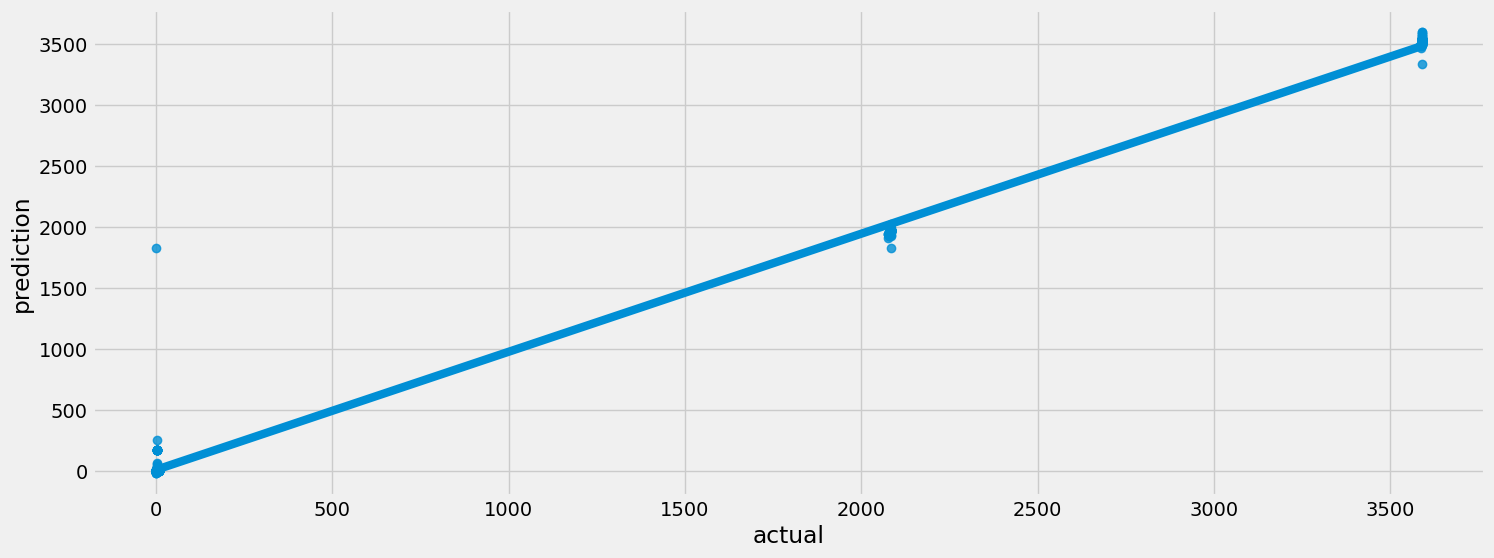

In [741]:
plt.figure(figsize=(16,6))
sns.regplot(x=predict['actual'],y=predict['prediction'])
plt.show()

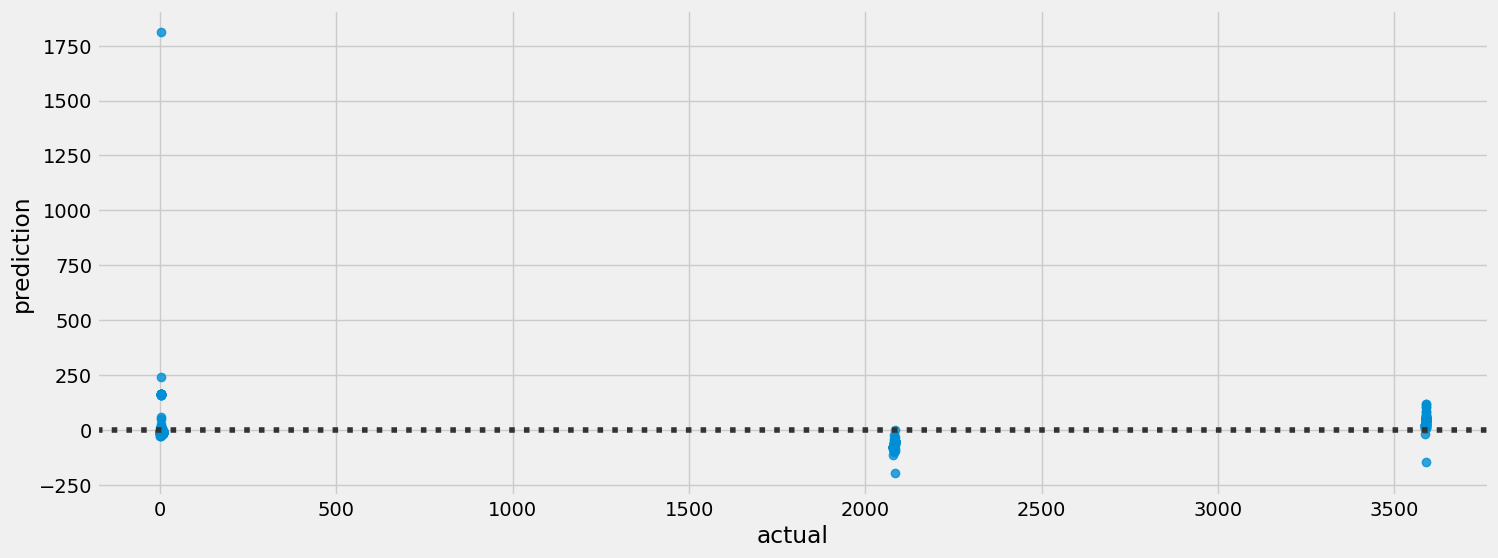

In [742]:
plt.figure(figsize=(16,6))
sns.residplot(x=predict['actual'],y=predict['prediction'])
plt.show()